# Polynomial Regression: extending linear models with basis functions

[link](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.

1. Se importan las librerías a utilizar.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas as pd

In [2]:
print(np.__version__)
print(pd.__version__)
import sys
print(sys.version)
import sklearn
print(sklearn.__version__)

2.2.2
2.2.3
3.10.16 | packaged by Anaconda, Inc. | (main, Dec 11 2024, 16:19:12) [MSC v.1929 64 bit (AMD64)]
1.6.1


***

$$y = X^3 + 100 + \epsilon$$

Se genera un conjunto de valores aleatorios y se meten a una función de tercer grado. 

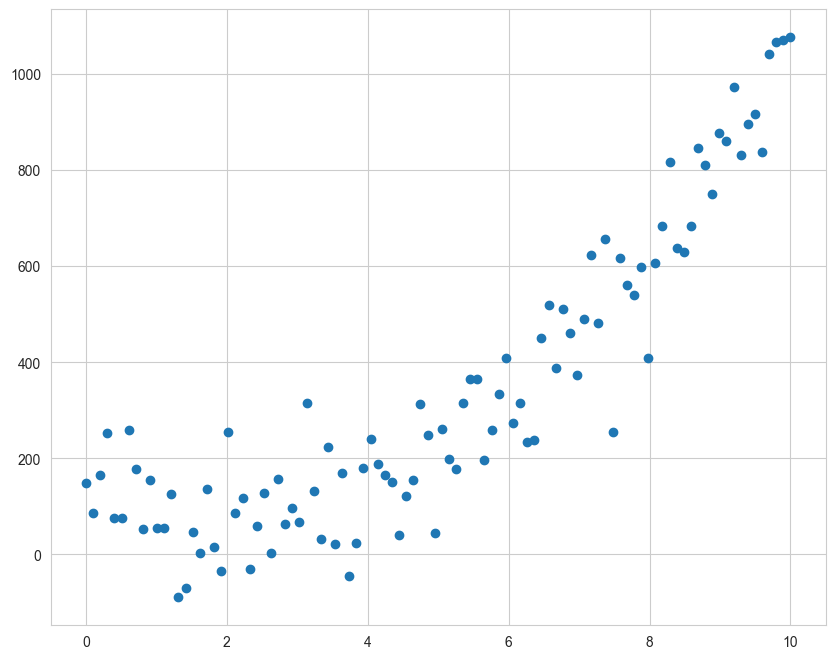

In [3]:
np.random.seed(42)
n_samples = 100

X = np.linspace(0, 10, 100)
rng = np.random.randn(n_samples) * 100

y = X ** 3 + 100 + rng

plt.figure(figsize=(10,8));
plt.scatter(X, y);

Importamos las librerías de regresión lineal para ver cómo se comportaría un modelo de este tipo con datos que no necesariamente presentan un comportamiento lineal. 

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Linear Regression

Se crea el modelo y se ajusta. Al momento de evaluarlo nos arroja un R2 = 0.764, diciéndonos que el modelo se ajusta pero no es del todo bueno. 

0.7643394574930141


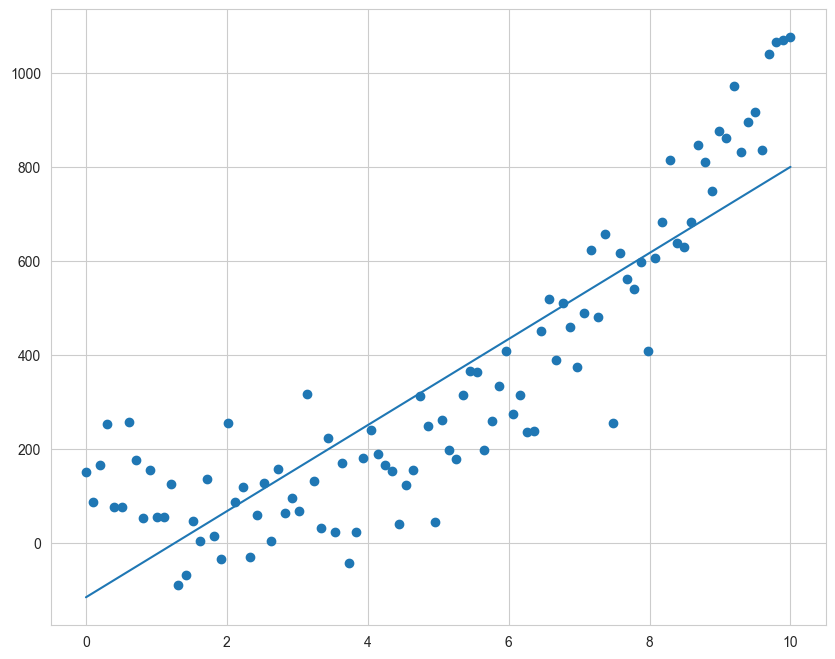

In [5]:
lr = LinearRegression()
lr.fit(X.reshape(-1, 1), y)
model_pred = lr.predict(X.reshape(-1,1))

plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, model_pred);
print(r2_score(y, model_pred))

## Polynomial

Probamos con un modelo polinomial. Se importan las librerias para crear y entrenar un modelo de grado 2. 

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X.reshape(-1, 1))

In [8]:
X[:5]

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

In [9]:
X_poly[:5]

array([[1.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304],
       [1.        , 0.2020202 , 0.04081216],
       [1.        , 0.3030303 , 0.09182736],
       [1.        , 0.4040404 , 0.16324865]])

In [10]:
degree_three = PolynomialFeatures(degree=3)
example = degree_three.fit_transform(X.reshape(-1, 1))

In [11]:
example[:5]

array([[1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.1010101 , 0.01020304, 0.00103061],
       [1.        , 0.2020202 , 0.04081216, 0.00824488],
       [1.        , 0.3030303 , 0.09182736, 0.02782647],
       [1.        , 0.4040404 , 0.16324865, 0.06595905]])

In [12]:
res = np.array([0, 1, 2, 3, 4, 5])

In [13]:
res

array([0, 1, 2, 3, 4, 5])

In [14]:
res_two = poly_reg.fit_transform(res.reshape(-1, 1))
res_two

array([[ 1.,  0.,  0.],
       [ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [15]:
res_three = degree_three.fit_transform(res.reshape(-1, 1))
res_three

array([[  1.,   0.,   0.,   0.],
       [  1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.],
       [  1.,   3.,   9.,  27.],
       [  1.,   4.,  16.,  64.],
       [  1.,   5.,  25., 125.]])

In [16]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y.reshape(-1, 1))
y_pred = lin_reg_2.predict(X_poly)

Con un modelo de regresión polinomial grado 3, podemos observar en la gráfica que éste se ajusta más a nuestros datos como era esperado. Al evaluarlo, tenemos un R2=0.917 mucho mejor que el que se había obtenido utilizando un modelo lineal. 

0.9173858308909386


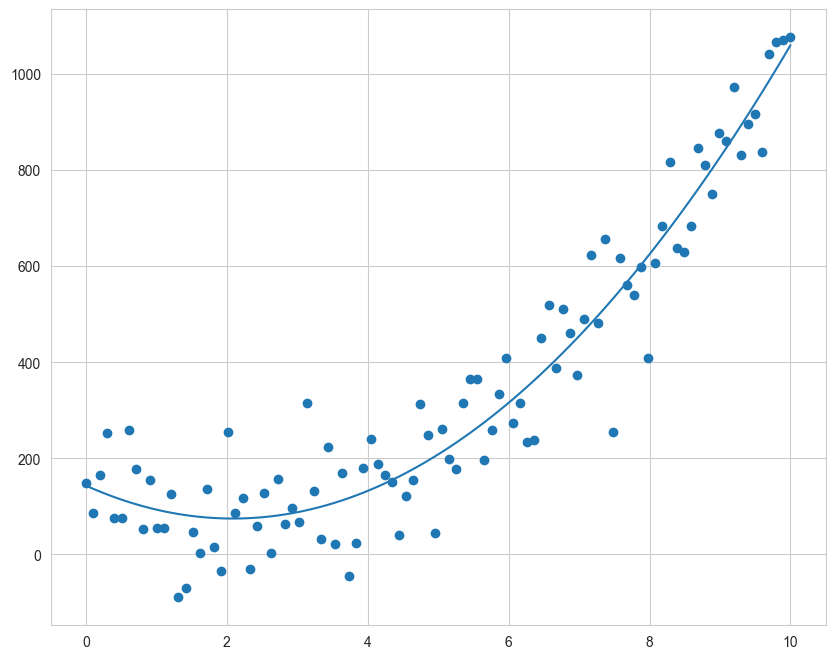

In [17]:
plt.figure(figsize=(10,8));
plt.scatter(X, y);
plt.plot(X, y_pred);
print(r2_score(y, y_pred))

***

# Boston Housing Dataset

A continuación se evaluara los distintos modelos de regresión para el conjunto de datos del costo de la vivienda en Boston. Para ello importamos el dataset. 

In [18]:
df_boston = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)
df_boston.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
              'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
#sns.pairplot(df_boston, size=1.5);

C:\Users\pepez\AppData\Local\Temp\ipykernel_15656\2249071003.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_boston = pd.read_csv('data//housing.data', delim_whitespace=True, header=None)


In [19]:
pd.options.display.float_format = "{:,.2f}".format
df_boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


In [20]:
X_boston = df_boston['DIS'].values
y_boston = df_boston['NOX'].values

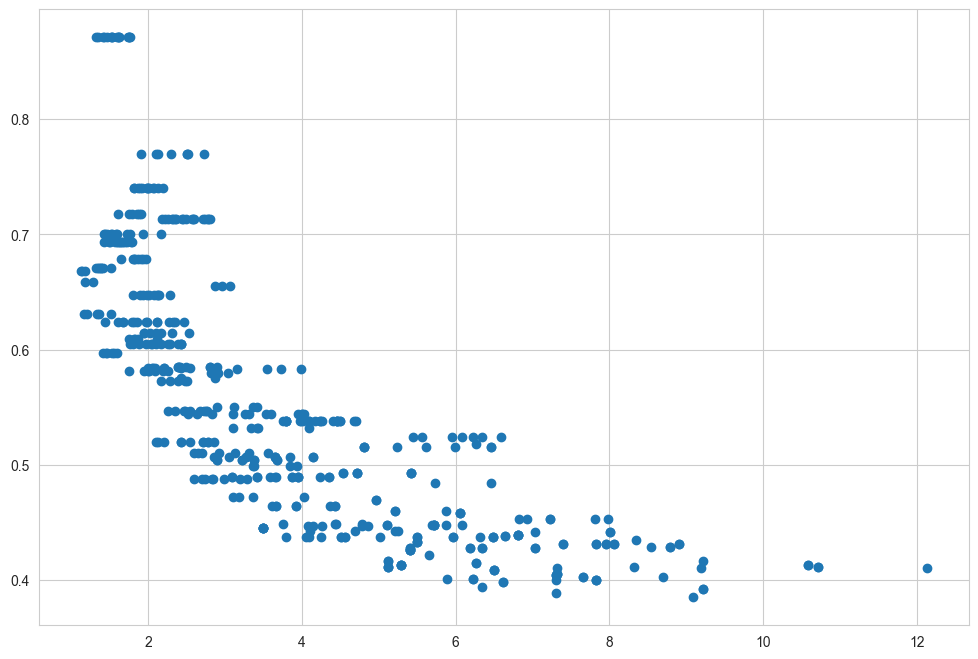

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);

## Linear

Para el modelo linear se tiene un R2 = 0.59, lo que nos indica un mal ajuste. 

R^2 score = 0.59


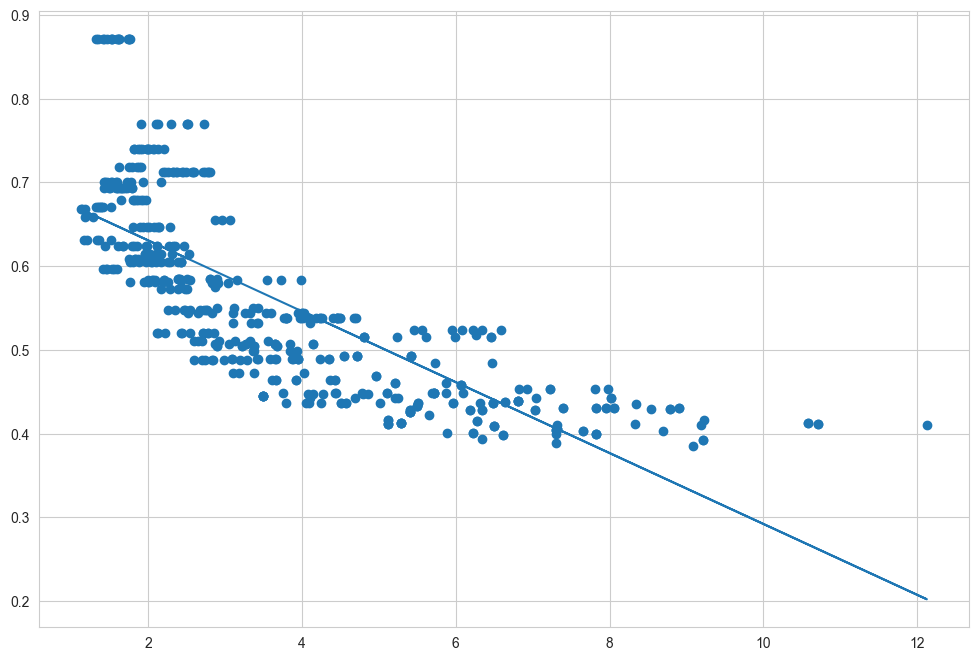

In [22]:
lr = LinearRegression()
lr.fit(X_boston.reshape(-1, 1), y_boston)
model_pred = lr.predict(X_boston.reshape(-1,1))

plt.figure(figsize=(12,8))
plt.scatter(X_boston, y_boston);
plt.plot(X_boston, model_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, model_pred)))

## Quadratic

Al intentarlo con una función cuadrada, es decir, grado 2 tenemos un R2=0.70. Este resultado es mejor que utilizando un modelo lineal, pero aún hay oportunidad de mejorar. 

In [23]:
poly_reg = PolynomialFeatures(degree=2)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_2 = LinearRegression()

In [24]:
lin_reg_2.fit(X_poly_b, y_boston)

LinearRegression()

In [25]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [26]:
X_fit

array([[ 1.1296],
       [ 2.1296],
       [ 3.1296],
       [ 4.1296],
       [ 5.1296],
       [ 6.1296],
       [ 7.1296],
       [ 8.1296],
       [ 9.1296],
       [10.1296],
       [11.1296]])

In [27]:
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.70


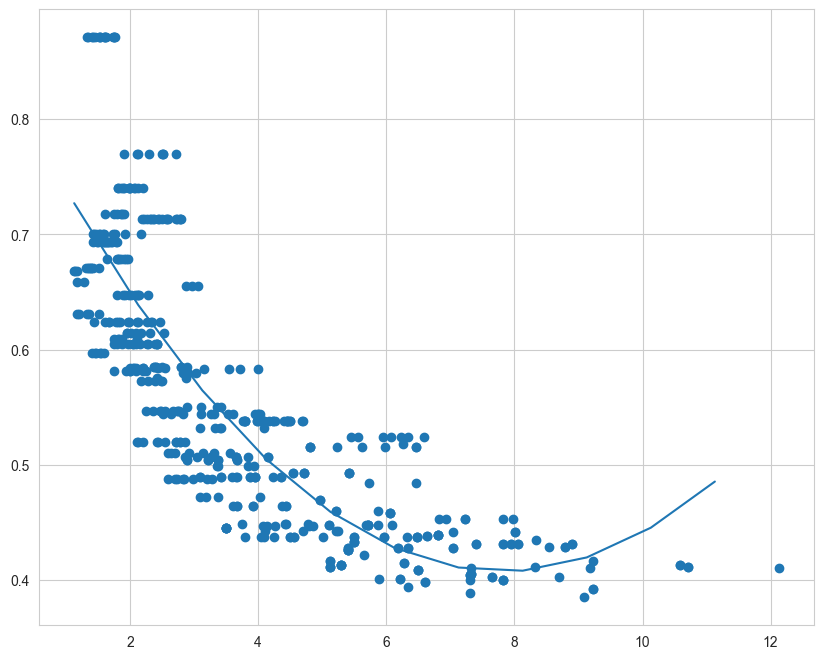

In [ ]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_2.predict(X_poly_b))))

## Cubic

El modelo cúbico nos da un R2 similar a una función cuadrática, con un valor de R2 = 0.71, por lo que cualquiera de ambos modelos se pudieran utilizar. 

In [29]:
poly_reg = PolynomialFeatures(degree=3)
X_poly_b = poly_reg.fit_transform(X_boston.reshape(-1, 1))
lin_reg_3 = LinearRegression()

In [30]:
lin_reg_3.fit(X_poly_b, y_boston)

LinearRegression()

In [31]:
X_fit = np.arange(X_boston.min(), X_boston.max(), 1)[:, np.newaxis]

In [32]:
y_pred = lin_reg_3.predict(poly_reg.fit_transform(X_fit.reshape(-1,1)))

R^2 score = 0.71


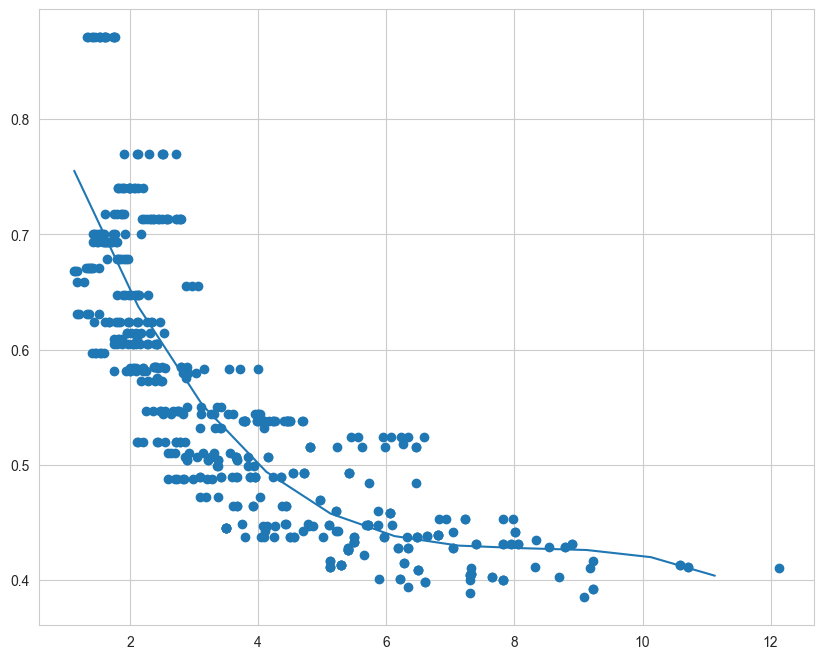

In [33]:
plt.figure(figsize=(10,8));
plt.scatter(X_boston, y_boston);
plt.plot(X_fit, y_pred);
print("R^2 score = {:.2f}".format(r2_score(y_boston, 
                                          lin_reg_3.predict(X_poly_b))))

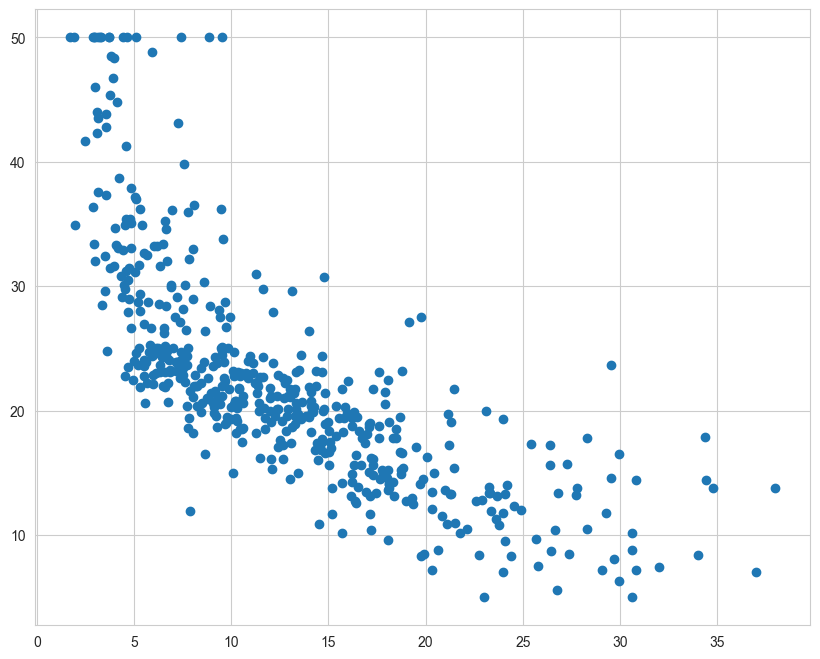

In [36]:
X_boston2 = df_boston['LSTAT'].values
y_boston2 = df_boston['MEDV'].values
plt.figure(figsize=(10,8));
plt.scatter(X_boston2, y_boston2);

***